<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject: A DataFrame of Your Weather Forecast</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/dataframe-nws-weather-forecast/">https://discovery.cs.illinois.edu/microproject/dataframe-nws-weather-forecast/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data API: National Weather Service (NWS) Weather Forecast

The National Weather Service allows, for free, "developers access to critical forecasts, alerts, and observations, along with other weather data."  You can find the full documentation of their API at: [https://www.weather.gov/documentation/services-web-api](https://www.weather.gov/documentation/services-web-api).

Since weather data is based on your location, you need to find the latitude and longitude of coordinate of your location!

- One quick way to do this is to pull up [Google Maps](https://maps.google.com/) and **right click** on a location.  *(Since this is NWS data, make sure your location is in the United States.)*
- The first option will be the `latitude, longitude` of the location of your click on the map.  You can click it to copy it to your clipboard!

Once you have your location, add each component to a variable below:

In [3]:
latitude = 38.275335
longitude = -107.356819

### Finding Your Forecast Area

The National Weather Service API provides a `/points/` endpoint that uses the `latitude,longitude` value to return a weather forecast.  The full URL for this endpoint is in the following format:

```
https://api.weather.gov/points/LATITUDE,LONGITUDE
```

This endpoint also returns a JSON that can be read using `pd.read_json`.  The `read_json` command is very similar to the `read_csv` command, except that we need to specify the "type" of JSON.

- Use `pd.read_json(...)` to use pandas's `read_json` function.
- The function requires two parameters:
    1. The URL of the JSON.  *Make sure to replace `LATITUDE` and `LONGITUDE` with your actual latitude and longitude.*
    2. For the second parameter, include the option `typ="series"`.
- For example: `pd.read_json("https://...", typ="series")`

Store the result in a variable named `pointsJSON`:

In [7]:
import pandas as pd
pointsJSON = pd.read_json("https://api.weather.gov/points/38.275335,-107.356819", typ="series")
pointsJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
id             https://api.weather.gov/points/38.2753,-107.3568
type                                                    Feature
geometry      {'type': 'Point', 'coordinates': [-107.3568, 3...
properties    {'@id': 'https://api.weather.gov/points/38.275...
dtype: object

### Finding Your Forecast URL

The JSON you just loaded has multiple fields including two fields with data:

- `geometry`, which include the geometric area for the forecast (you supplied a single point, but weather forecasts are given for areas that can be many square miles),
- `properties`, which includes all properties about the location you requested,
- ...and a few others (`id`, `type`).

You can inspect the data further by running `pointsJSON["geometry"]` or `pointsJSON["properties"]`.  In the following cell, inspect the **properties** data and look for the URL that provides the **hourly forecast**.


In [9]:
pointsJSON["properties"]

{'@id': 'https://api.weather.gov/points/38.2753,-107.3568',
 '@type': 'wx:Point',
 'cwa': 'GJT',
 'forecastOffice': 'https://api.weather.gov/offices/GJT',
 'gridId': 'GJT',
 'gridX': 134,
 'gridY': 62,
 'forecast': 'https://api.weather.gov/gridpoints/GJT/134,62/forecast',
 'forecastHourly': 'https://api.weather.gov/gridpoints/GJT/134,62/forecast/hourly',
 'forecastGridData': 'https://api.weather.gov/gridpoints/GJT/134,62',
 'observationStations': 'https://api.weather.gov/gridpoints/GJT/134,62/stations',
 'relativeLocation': {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-107.310176, 38.030504]},
  'properties': {'city': 'Lake City',
   'state': 'CO',
   'distance': {'unitCode': 'wmoUnit:m', 'value': 27523.711550161},
   'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 351}}},
 'forecastZone': 'https://api.weather.gov/zones/forecast/COZ018',
 'county': 'https://api.weather.gov/zones/county/COC051',
 'fireWeatherZone': 'https://api.weather.gov/zones/fire/CO

### Record Your Forecast URL

Finally, record the URL that you can use to find the hourly forecast for your location:

In [10]:
hourlyForecastURL = "https://api.weather.gov/gridpoints/GJT/134,62/forecast/hourly"
hourlyForecastURL

'https://api.weather.gov/gridpoints/GJT/134,62/forecast/hourly'

### 🔬 Microproject Checkpoint Tests 🔬

In [11]:
### TEST CASE for Data API

tada = "\N{PARTY POPPER}"
assert("/points/" in pointsJSON["id"])
assert(f"/{int(latitude)}" in pointsJSON["id"])
assert(f",{int(longitude)}" in pointsJSON["id"])
assert("/gridpoints/" in hourlyForecastURL)
assert("/forecast/hourly" in hourlyForecastURL)
print(f"{tada} Data API: All Tests Passed! {tada}")

🎉 Data API: All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Puzzle 1: Loading Your Weather Forecast as a DataFrame

In the same way as you did in the beginning of this MicroProject, use `pd.read_json` to load the your weather forecast.  Store your result in the variable `forecastJSON`:

In [13]:
forecastJSON = pd.read_json("https://api.weather.gov/gridpoints/GJT/134,62/forecast/hourly", typ="series")
forecastJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[-107.363...
properties    {'units': 'us', 'forecastGenerator': 'HourlyFo...
dtype: object

### Finding the Forecast Data

Inside of the `properties` data, the `periods` data provides a **well-defined, structured** set of data that contains the forecast for every hour for your location.

Check out how it looks in the raw form:

In [14]:
# Observe the "top level" of the JSON:
forecastJSON

@context      [https://geojson.org/geojson-ld/geojson-contex...
type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[-107.363...
properties    {'units': 'us', 'forecastGenerator': 'HourlyFo...
dtype: object

In [15]:
# Observe the "properties" data in the JSON:
forecastJSON["properties"]

{'units': 'us',
 'forecastGenerator': 'HourlyForecastGenerator',
 'generatedAt': '2024-09-30T15:36:48+00:00',
 'updateTime': '2024-09-30T12:30:37+00:00',
 'validTimes': '2024-09-30T06:00:00+00:00/P7DT19H',
 'elevation': {'unitCode': 'wmoUnit:m', 'value': 3151.0224},
 'periods': [{'number': 1,
   'name': '',
   'startTime': '2024-09-30T09:00:00-06:00',
   'endTime': '2024-09-30T10:00:00-06:00',
   'isDaytime': True,
   'temperature': 49,
   'temperatureUnit': 'F',
   'temperatureTrend': '',
   'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 1},
   'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -0.555555555555555},
   'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 48},
   'windSpeed': '10 mph',
   'windDirection': 'W',
   'icon': 'https://api.weather.gov/icons/land/day/few?size=small',
   'shortForecast': 'Sunny',
   'detailedForecast': ''},
  {'number': 2,
   'name': '',
   'startTime': '2024-09-30T10:00:00-06:00',
   'endTime': '2024-09-30T11:00:

In [16]:
# Observe the "properties"->"periods" data in the JSON:
forecastJSON["properties"]["periods"]

[{'number': 1,
  'name': '',
  'startTime': '2024-09-30T09:00:00-06:00',
  'endTime': '2024-09-30T10:00:00-06:00',
  'isDaytime': True,
  'temperature': 49,
  'temperatureUnit': 'F',
  'temperatureTrend': '',
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 1},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -0.555555555555555},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 48},
  'windSpeed': '10 mph',
  'windDirection': 'W',
  'icon': 'https://api.weather.gov/icons/land/day/few?size=small',
  'shortForecast': 'Sunny',
  'detailedForecast': ''},
 {'number': 2,
  'name': '',
  'startTime': '2024-09-30T10:00:00-06:00',
  'endTime': '2024-09-30T11:00:00-06:00',
  'isDaytime': True,
  'temperature': 55,
  'temperatureUnit': 'F',
  'temperatureTrend': '',
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 1},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -1.111111111111111},
  'relativeHumidity': {'unitCode': 'wmoUnit

### Loading the Data at a DataFrame

Since we have **clean, structured data**, we can read it into pandas!  The code below creates a DataFrame out of the above data by using the `pd.DataFrame` command:

In [17]:
df = pd.DataFrame(forecastJSON["properties"]["periods"])
df

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,,2024-09-30T09:00:00-06:00,2024-09-30T10:00:00-06:00,True,49,F,,"{'unitCode': 'wmoUnit:percent', 'value': 1}","{'unitCode': 'wmoUnit:degC', 'value': -0.55555...","{'unitCode': 'wmoUnit:percent', 'value': 48}",10 mph,W,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
1,2,,2024-09-30T10:00:00-06:00,2024-09-30T11:00:00-06:00,True,55,F,,"{'unitCode': 'wmoUnit:percent', 'value': 1}","{'unitCode': 'wmoUnit:degC', 'value': -1.11111...","{'unitCode': 'wmoUnit:percent', 'value': 38}",10 mph,WNW,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
2,3,,2024-09-30T11:00:00-06:00,2024-09-30T12:00:00-06:00,True,60,F,,"{'unitCode': 'wmoUnit:percent', 'value': 1}","{'unitCode': 'wmoUnit:degC', 'value': -1.66666...","{'unitCode': 'wmoUnit:percent', 'value': 30}",10 mph,WNW,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
3,4,,2024-09-30T12:00:00-06:00,2024-09-30T13:00:00-06:00,True,63,F,,"{'unitCode': 'wmoUnit:percent', 'value': 2}","{'unitCode': 'wmoUnit:degC', 'value': -2.22222...","{'unitCode': 'wmoUnit:percent', 'value': 26}",15 mph,NW,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
4,5,,2024-09-30T13:00:00-06:00,2024-09-30T14:00:00-06:00,True,65,F,,"{'unitCode': 'wmoUnit:percent', 'value': 2}","{'unitCode': 'wmoUnit:degC', 'value': -3.33333...","{'unitCode': 'wmoUnit:percent', 'value': 23}",15 mph,NW,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,,2024-10-06T16:00:00-06:00,2024-10-06T17:00:00-06:00,True,61,F,,"{'unitCode': 'wmoUnit:percent', 'value': 1}","{'unitCode': 'wmoUnit:degC', 'value': -6.66666...","{'unitCode': 'wmoUnit:percent', 'value': 20}",10 mph,WNW,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
152,153,,2024-10-06T17:00:00-06:00,2024-10-06T18:00:00-06:00,True,58,F,,"{'unitCode': 'wmoUnit:percent', 'value': 1}","{'unitCode': 'wmoUnit:degC', 'value': -6.66666...","{'unitCode': 'wmoUnit:percent', 'value': 22}",10 mph,NW,https://api.weather.gov/icons/land/day/few?siz...,Sunny,
153,154,,2024-10-06T18:00:00-06:00,2024-10-06T19:00:00-06:00,False,56,F,,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': -6.11111...","{'unitCode': 'wmoUnit:percent', 'value': 25}",10 mph,NW,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,
154,155,,2024-10-06T19:00:00-06:00,2024-10-06T20:00:00-06:00,False,52,F,,"{'unitCode': 'wmoUnit:percent', 'value': 0}","{'unitCode': 'wmoUnit:degC', 'value': -5.55555...","{'unitCode': 'wmoUnit:percent', 'value': 30}",5 mph,WNW,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,


### 🔬 Microproject Checkpoint Tests 🔬

In [18]:
### TEST CASE for Puzzle 1: Loading Your Weather Forecast as a DataFrame

tada = "\N{PARTY POPPER}"
assert("df" in vars())
assert("startTime" in df)
assert("temperature" in df)
print(f"{tada} Puzzle 1: All Tests Passed! {tada}")

🎉 Puzzle 1: All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Puzzle 2: Exploring Your Weather

Now that you have the weather forecast for **your location** loaded into the DataFrame `df`, it's time to nerd out with it!

### Your Warmest Upcoming Temperature

Using your data, find the warmest temperature in the entire forecast!  Save that row as `df_warmest`:

In [19]:
df_warmest = df.nlargest(1, "temperature")
df_warmest

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
29,30,,2024-10-01T14:00:00-06:00,2024-10-01T15:00:00-06:00,True,67,F,,"{'unitCode': 'wmoUnit:percent', 'value': 1}","{'unitCode': 'wmoUnit:degC', 'value': -5}","{'unitCode': 'wmoUnit:percent', 'value': 18}",15 mph,WNW,https://api.weather.gov/icons/land/day/few?siz...,Sunny,


### Your Coldest Upcoming Temperature

Using your data, find the coldest temperature in the entire forecast!  Save that row as `df_coldest`:

In [20]:
df_coldest = df.nsmallest(1, "temperature")
df_coldest

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
141,142,,2024-10-06T06:00:00-06:00,2024-10-06T07:00:00-06:00,True,38,F,,"{'unitCode': 'wmoUnit:percent', 'value': 1}","{'unitCode': 'wmoUnit:degC', 'value': -6.66666...","{'unitCode': 'wmoUnit:percent', 'value': 48}",5 mph,S,https://api.weather.gov/icons/land/day/skc?siz...,Sunny,


### Hours of Sky Conditions

The `shortForecast` column provides a brief summary of the forecasted condition of the sky for each hour.  Create a DataFrame that contains a summary of upcoming sky conditions in only two columns:

- `shortForecast`, and
- `count`, containing the number of times that `shortForecast` appears in the forecast

For example, a `skySummary` might look like:

---

|    | shortForecast | count |
|----|---------------|-------|
| 0  | Sunny         | 39    |
| 1  | Partly Cloudy | 31    |
| ... | ... | ... |

---

Save the summary in the `skySummary` variable:

In [33]:
skySummary = df[["shortForecast", "temperatureUnit"]].groupby("shortForecast").agg("count").reset_index()
skySummary["count"] = skySummary["temperatureUnit"]
skySummary = skySummary[["shortForecast", "count"]]
skySummary

,shortForecast,count
0,Clear,38
1,Mostly Clear,37
2,Mostly Sunny,1
3,Sunny,80


### 🔬 MicroProject Checkpoint Tests 🔬

In [34]:
### TEST CASE for Puzzle 2: Exploring Your Weather

tada = "\N{PARTY POPPER}"

assert( len(df_warmest) == 1 ), "You should only have one warmest forecast record."
assert( df_warmest["temperature"].values[0] == max(df["temperature"]) )

assert( len(df_coldest) == 1 ), "You should only have one coldest forecast record."
assert( df_coldest["temperature"].values[0] == min(df["temperature"]) )

assert( len(skySummary) == len(df["shortForecast"].unique()) )
for shortForecast in df["shortForecast"].unique():
  rows_len = len(df[ df["shortForecast"] == shortForecast ])
  summary_ct = skySummary[ skySummary["shortForecast"] == shortForecast ]["count"].values[0]
  assert( rows_len == summary_ct ), f"Your skySummary for column {shortForecast} is incorrect (summary = {summary_ct}, expected = {rows_len})."

print(f"{tada} Puzzle 2: All Tests Passed! {tada}")

🎉 Puzzle 2: All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Puzzle 3: Create a Scatter Plot

Finally, let's create a scatter plot of your forecast!

Using `df.plot.scatter`, you must specify the `x` column name and `y` column name for your scatter plot to use the command:

```
df.plot.scatter(x="x-column", y="y-column")
```

Using your weather forecast:

- Use the starting date of the forecast as your `x` value,
- Use the temperature as your `y` value,
- Create your scatter plot! :)

Here's some additional options you can add to make your chart even better:
- Add `xticks = df.startTime.values[::6]` to show only every 6th tick to get fewer x-axis labels,
- Add `rot = 90` to rotate the labels 90 degrees (vertical),
- Add `grid = True` to add gridlines,
- Add `figsize = (10, 6)` to make the figure 10" wide and 6" tall to make it larger,
- Add all of these options to get a really useful visualization! :)

<Axes: xlabel='startTime', ylabel='temperature'>

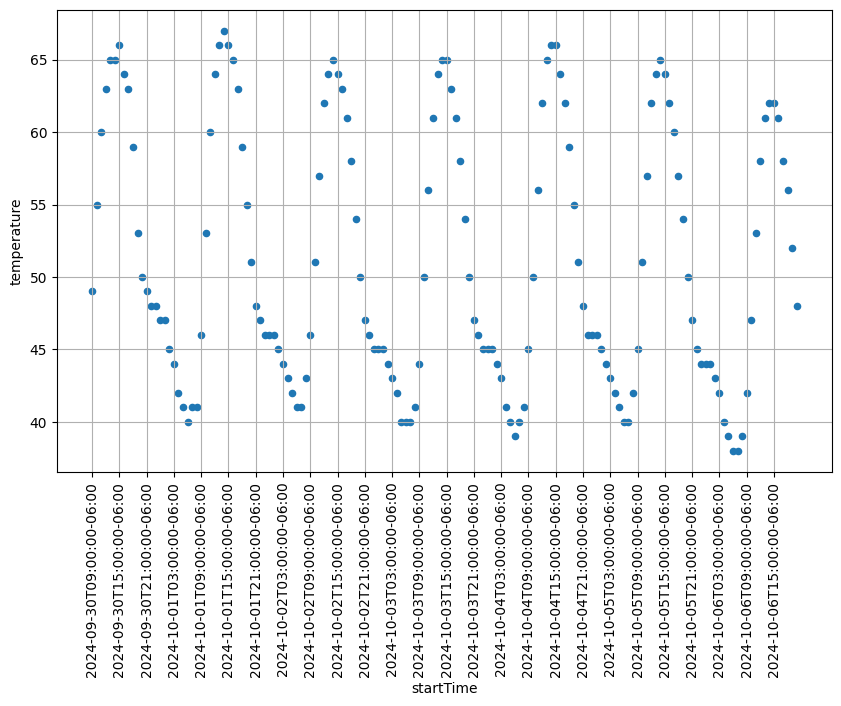

In [35]:
ax = df.plot.scatter(x="startTime", y="temperature", xticks=df.startTime.values[::6], rot=90, grid=True,figsize=(10,6))
ax

### Finally, save your graph as a variable

Just like DataFrames, graphs can be saved as a Python variable.  Return to the previous Python cell and save your graph as the variable `ax`.

Your final cell will looks something like:
```
ax = df.plot.scatter(...)
ax
```

### 🔬 MicroProject Checkpoint Tests 🔬

In [36]:
### TEST CASE for Puzzle 3: Create a Scatter Plot

tada = "\N{PARTY POPPER}"
import matplotlib.pyplot as plt

assert( "ax" in vars() )
assert( ax.axes.get_xticklabels()[0].get_text() in df.startTime.values )
ytick = float(ax.axes.get_yticklabels()[0].get_text())
assert( ytick > -200 )
assert( ytick < 200 )

print(f"{tada} Puzzle 3: All Tests Passed! {tada}")


🎉 Puzzle 3: All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/dataframe-nws-weather-forecast/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉